<a href="https://colab.research.google.com/github/ogwora/Core_IP6/blob/master/Moringa_Data_Science_Core_W6_IP_2021_09_Lawrence_Ondieki_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # MCHEZOPESA LTD
  
  ## 1. Formulate Question
  
  A Prediction result of a game between two teams; team A and team B, based on whether the game was played in the home, away or on a neutral venue.

## 1.1. Metric of Success

Optimal and reliable prediction Model:

Accuracy - 85% and above

## 1.2. CONTEXT

The game prediction for Mchezopesa will be based on FIFA Ranking. The FIFA rankings give an indication of how good a team is compared to the rest of teams that have participated in past tournaments sanctioned by FIFA.

## 1.3 Experimental Design

This project was carried out with: - 
1. Exploratory Data Analysis (EDA).
2. Clean up the data.
3. Buils a model
4. Train the model and use it for predictions.
5. Check the accuracy of the model.

## 2. Importing libraries

In [167]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.1. Loading the data from the FIFA dataset

In [168]:
# Loading Ranking dataset
ranking=pd.read_csv('fifa_ranking.csv')

In [169]:
#Preview ranking dataframe
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [170]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [171]:
#Loading results dataset
results=pd.read_csv('results.csv')

In [172]:
#Preview dataframe
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [173]:
#Dataframe info
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


Date names and formats in the two datasets are different. I will rename and give both same formats.


In [174]:
# Renaming the rank_date column
#
ranking.rank_date = ranking.rename({'rank_date': 'date'}, axis = 1, inplace = True)

In [175]:
# Changing the date columns to be uniform in both dataframes.
#
results.date = results.date.apply(lambda x: x.replace('/', '-'))
ranking.date = ranking.date.apply(lambda x: x.replace('/', '-'))

The date columns in both data sets are object data type(string). I will change to datatime type.


In [176]:
# Changing the date columns to datetime objects
#
ranking.date = pd.to_datetime(ranking.date)
results.date = pd.to_datetime(results.date)


To merge rankings and results dataframes, the dates need to be in the same format. 

These were also done in different months of diverse years. 

Merging will be done based on month and year


In [177]:
# Creating a year and month column from the datetime object
#
ranking['year'] = ranking.date.dt.year
results['year'] = results.date.dt.year

ranking['month'] = ranking.date.dt.month
results['month'] = ranking.date.dt.month

In [178]:
# Checking the unique years in the ranking dataset
#
ranking.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [179]:
# Checking the unique years in the results dataset
#
results.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

The results dataset has information from 1872 to 2019.
The rankings dataset has information from 1993 to 2018.
This will have a number of NaN in the years there were no rankings.

Merging the two data set on both month and year

In [180]:
# Merging the results dataframe to the ranking dataframe on month and year
#
merged_df= pd.merge(results, ranking, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
merged_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [181]:
# Ranking of home team
#
home_df = merged[merged.home_team == merged.country_full]

home_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18192,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18291,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18479,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18747,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18838,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,69.0,Thailand,THA,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1994-04-19


In [182]:
#Confirm columns to be renamed
#
home_df.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [183]:
# Renaming the selected home_df columns
for x, y in zip(home_df.columns[11:-2], home_df.columns[11:-2]):
  home_df.rename(columns = {x: y + '_home'}, inplace = True)
  
# Preview
home_df.columns[11:-2]

Index(['rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home'],
      dtype='object')

In [184]:
# Away team ranking details 
away_df = merged[merged.away_team == merged.country_full]
away_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18224,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18286,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18532,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18648,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18774,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [185]:
# Columns to be renamed in the away_merged dataframe
#
away_df.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [186]:
# Renaming away_merged columns
for x, y in zip(away_df.columns[11:-2], away_df.columns[11:-2]):
  away_df.rename(columns = {x: y + '_away'}, inplace = True)
  
# Preview
away_df.columns[11:-2]

Index(['rank_away', 'country_full_away', 'country_abrv_away',
       'total_points_away', 'previous_points_away', 'rank_change_away',
       'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away'],
      dtype='object')

In [187]:
# Select only the relevant columns in the away_merged dataframe
#
relevant_cols = list(away_df.columns[9:-2])
relevant_cols.extend(['home_team', 'away_team'])

away_df= away_df[relevant_cols]

# Preview
#
away_df.head()

,year,month,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_team,away_team
18224,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barbados,Grenada
18286,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ghana,Egypt
18532,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mali,Burkina Faso
18648,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mauritania,Mali
18774,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thailand,Nigeria


In [188]:
# Merging dataframes to get a final one to use
final_df = pd.merge(home_df, away_df, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])
# Preview
final_df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,country_full_home,country_abrv_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,date_y,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
# Remove irrelevant columns from the final dataframe

drop_cols = ['country_full_home', 'country_abrv_home', 'date_y', 'country_full_away',	'country_abrv_away']
final_df.drop(drop_cols, axis = 1, inplace = True)

In [190]:
# Checking for missing values
#
final_df.isnull().sum()

date_x                             0
home_team                          0
away_team                          0
home_score                         0
away_score                         0
tournament                         0
city                               0
country                            0
neutral                            0
year                               0
month                              0
rank_home                          0
total_points_home                  0
previous_points_home               0
rank_change_home                   0
cur_year_avg_home                  0
cur_year_avg_weighted_home         0
last_year_avg_home                 0
last_year_avg_weighted_home        0
two_year_ago_avg_home              0
two_year_ago_weighted_home         0
three_year_ago_avg_home            0
three_year_ago_weighted_home       0
confederation                      0
rank_away                       1811
total_points_away               1811
previous_points_away            1811
r

In [191]:
# Dropping missing values
#
final_df.dropna(inplace=True)

In [192]:
# Save the clean dataframe for later use.
final_df.to_csv('clean_data.csv')

In [193]:
#load clean data
clean_df=pd.read_csv('clean_data.csv')

In [194]:
#Preview the clean dataframe
#
clean_df.head()

,Unnamed: 0,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. EXPLORATORY DATA ANALYSIS

Information which to be used in EDA: -
- Country.
- Rank.
- City.
- Home/Away/Neutral Team, 
- Home/Away Score.
- Confederation.
- Tournament.

In [195]:
clean_df.shape

(18767, 37)

In [196]:
#creating a new column called results that is computed by the home score - the away score

clean_df['result'] = clean_df['home_score'] - clean_df['away_score']
      

In [197]:
#creating a function for the win ,loss and draw

def result(x):
  if x >0:
    return 'win'
  elif x<0:
    return 'loss'
  else:
    return 'draw'

In [198]:
#Implementing and applying our function

clean_df['results']=clean_df.result.apply(lambda x: result(x))

In [199]:
clean_df.head()

,Unnamed: 0,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,results
0,0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
1,1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
2,2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,win
3,3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
4,4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,loss


## 3.1 Univariate Analysis

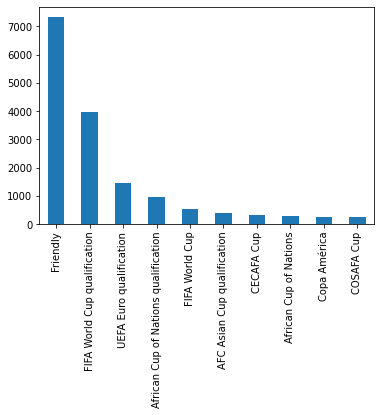

In [200]:
#Plotting a bar graph of tournament

clean_df['tournament'].value_counts().head(10).plot.bar()
plt.show()

From the bar graph, friendly games were played more than any other kind of game.

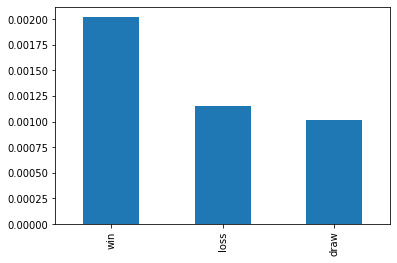

In [201]:
#Plotting a bar graph for the results

(clean_df['results'].value_counts().head(10)/len(merged)).plot.bar()
plt.show()

Majority of the games were won compared to draw or loss.

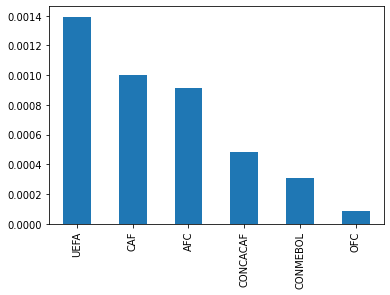

In [202]:
#plotting a bar graph for the confederation

(clean_df['confederation'].value_counts().head(10)/len(merged)).plot.bar()
plt.show()

UEFA organized majority of the matches while OFC organized the least.

## 4. Logistic Regression
Logistic regression will be used to train the models and predict the outcome.

In [203]:
#Previewing our dataset

clean_df.head()

,Unnamed: 0,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,results
0,0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
1,1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
2,2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,win
3,3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,draw
4,4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2,loss


In [204]:
clean_df.drop(['date_x'],axis=1, inplace= True)

 We split the dataset into training(90%) and test (10%) sets. I use the test dataset only for the final prediction.

In [205]:
# Selecting the relevant features for the logistic regression model
#
data = clean_df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'rank_home', 'rank_away', 'result']]

# Previewing the first five rows of the data
#
data.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result
0,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0
1,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0
2,Ghana,Egypt,2,1,Friendly,1994,29.0,24.0,1
3,Mali,Burkina Faso,1,1,Friendly,1994,48.0,101.0,0
4,Mauritania,Mali,1,3,Friendly,1994,147.0,48.0,-2


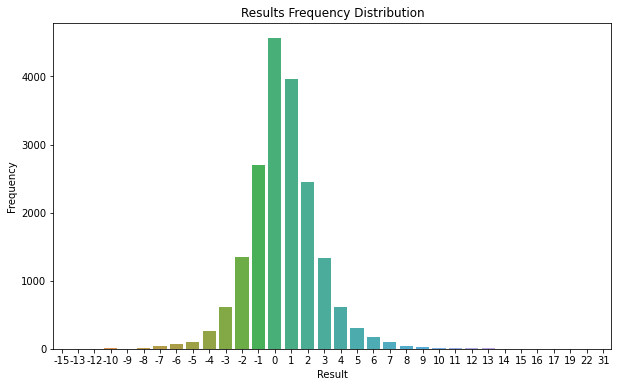

In [206]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 6))
ax = sns.countplot(data.result)
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Results Frequency Distribution')
plt.show()

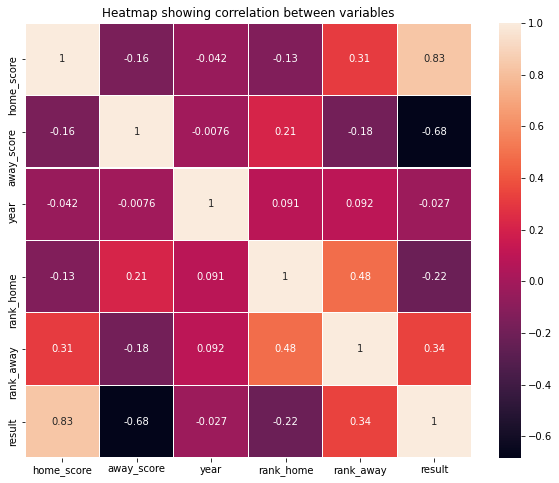

In [207]:
#Checking for correlations between features
#
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, linewidths=0.1) 
plt.title('Heatmap showing correlation between variables')
plt.show()

### Pair plots

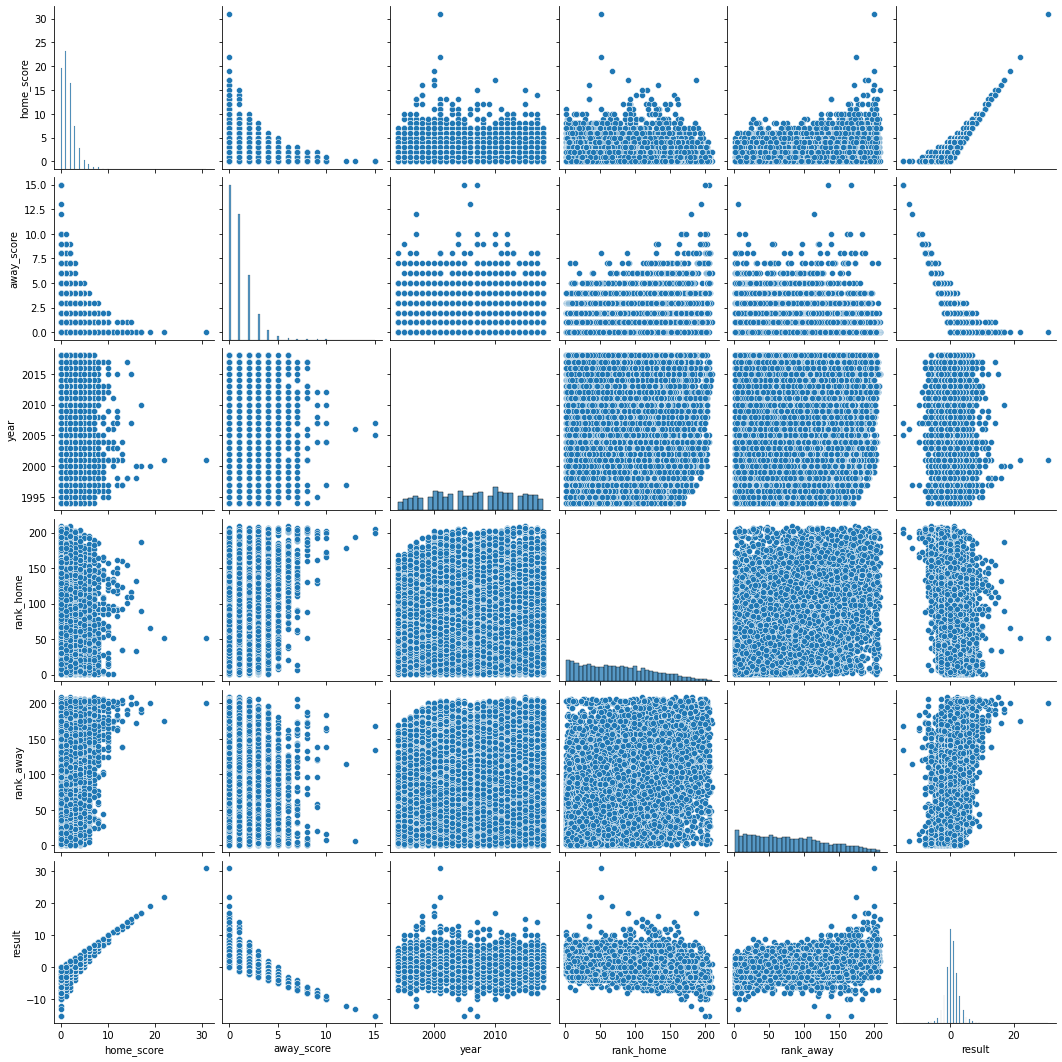

In [223]:
sns.pairplot(data)
plt.show()

### Homescore has a positive correlation whereas away score has a negative corelation with the result.

In [208]:

data['results']=data.result.apply(lambda x: result(x))

In [209]:
#Spliting the data into features and the target variable
#
X = data.drop(columns=['result', 'results', 'home_score', 'away_score', 'home_team',	'away_team'])
y = data.results

In [210]:
data.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result,results
0,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0,draw
1,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,0,draw
2,Ghana,Egypt,2,1,Friendly,1994,29.0,24.0,1,win
3,Mali,Burkina Faso,1,1,Friendly,1994,48.0,101.0,0,draw
4,Mauritania,Mali,1,3,Friendly,1994,147.0,48.0,-2,loss


In [211]:
 #Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)
X.head()

,year,rank_home,rank_away,tournament_AFC Asian Cup,tournament_AFC Asian Cup qualification,tournament_AFC Challenge Cup,tournament_AFC Challenge Cup qualification,tournament_AFF Championship,tournament_African Cup of Nations,tournament_African Cup of Nations qualification,tournament_African Nations Championship,tournament_Amílcar Cabral Cup,tournament_Baltic Cup,tournament_CECAFA Cup,tournament_CFU Caribbean Cup,tournament_CFU Caribbean Cup qualification,tournament_COSAFA Cup,tournament_Confederations Cup,tournament_Copa América,tournament_Copa América qualification,tournament_Copa Paz del Chaco,tournament_Copa del Pacífico,tournament_Cyprus International Tournament,tournament_Dragon Cup,tournament_Dunhill Cup,tournament_Dynasty Cup,tournament_EAFF Championship,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup,tournament_Gold Cup qualification,tournament_Gulf Cup,tournament_Intercontinental Cup,tournament_King Hassan II Tournament,tournament_King's Cup,tournament_Kirin Cup,tournament_Korea Cup,tournament_Lunar New Year Cup,tournament_Malta International Tournament,tournament_Merdeka Tournament,tournament_Millennium Cup,tournament_Nations Cup,tournament_Nehru Cup,tournament_Nile Basin Tournament,tournament_Nordic Championship,tournament_OSN Cup,tournament_Oceania Nations Cup,tournament_Oceania Nations Cup qualification,tournament_Pacific Games,tournament_Prime Minister's Cup,tournament_SAFF Cup,tournament_SKN Football Festival,tournament_Simba Tournament,tournament_South Pacific Games,tournament_Tournoi de France,tournament_UAFA Cup,tournament_UAFA Cup qualification,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UEFA Nations League,tournament_UNCAF Cup,tournament_UNIFFAC Cup,tournament_USA Cup,tournament_United Arab Emirates Friendship Tournament,tournament_VFF Cup,tournament_WAFF Championship,tournament_Windward Islands Tournament
0,1994,99.0,131.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1994,99.0,131.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1994,29.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1994,48.0,101.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1994,147.0,48.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)                                           

In [225]:
y

0        draw
1        draw
2         win
3        draw
4        loss
         ... 
18762     win
18763    loss
18764    loss
18765    draw
18766    draw
Name: results, Length: 18767, dtype: object

In [233]:
#import the class

from sklearn.linear_model import LogisticRegression

# define the logistic regression model
logreg= LogisticRegression()


In [234]:
#Fit the model with data

logreg.fit(X_train,y_train)

#
y_pred= logreg.predict(X_test)

In [222]:
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)
print('Score: ',score)
print('Score2: ', score2)

Score:  0.5709413854351687
Score2:  0.5758738277919864


The logistic regression has a score of about 57%

## 5. Confusion Matrix

This is used to evaluate the performance of our model

In [215]:
#import the metrics class
from sklearn import metrics

cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[   0,  353,  780],
       [   0,  723,  560],
       [   0,  297, 1979]])

### Confusion matrix using heatmap

Text(0.5, 15.0, 'Predicted Label')

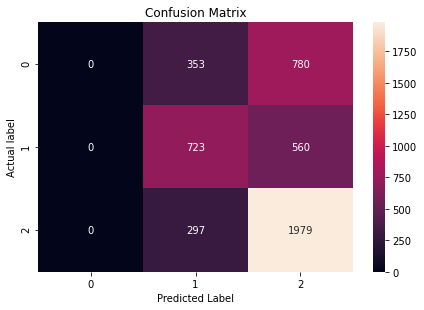

In [217]:

#Create Heatmap

#plt.figure(dpi=700,figsize=(10,10))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')


# Confusion Matrix Evaluation Metrics

Lets evaluate the model using accuracy, precision and recall

In [218]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))
print("Precision", metrics.accuracy_score(y_test,y_pred))
print("Recall", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.5758738277919864
Precision 0.5758738277919864
Recall 0.5758738277919864


Precision is about being precise, how accurate your mode is in other word when your model makes a prediction how accurate is it

## 6. Conclusion
With a classification of 57%, the basic logistic regression model didn't achieve the 85% accuracy target.

## 7. Further investigation.
Further work need to be done by tweaking the logistic regression model further and try other models as well.